## Importando bibliotecas e dataset

In [67]:
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Treating dataset

In [50]:
#wine dataset
#names = creating a header to wine dataset 
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", usecols=[1, 2], 
                 names=['Alcohol', 'Malic acid'])

#considering only the alcohol and malic acid from the wine dataset
df.head()

,Alcohol,Malic acid
0,14.23,1.71
1,13.20,1.78
2,13.16,2.36
3,14.37,1.95
4,13.24,2.59


In [51]:
df.describe(include = "all")

,Alcohol,Malic acid
count,178.000000,178.000000
mean,13.000618,2.336348
std,0.811827,1.117146
min,11.030000,0.740000
25%,12.362500,1.602500
50%,13.050000,1.865000
75%,13.677500,3.082500
max,14.830000,5.800000


## Plotting data

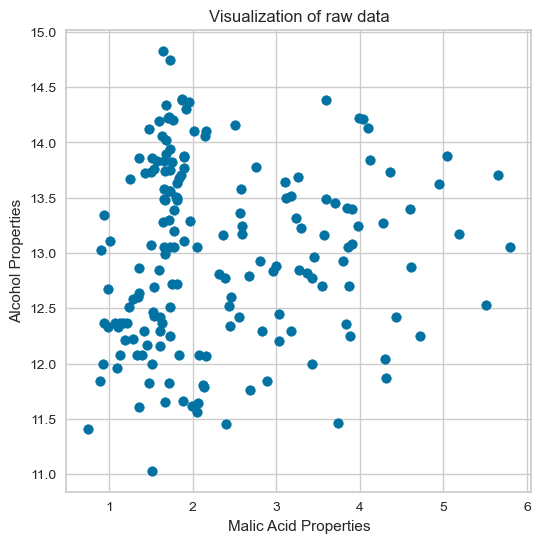

In [52]:

malic = df.iloc[:, 1]
alcohol = df.iloc[:, 0]

#plotting 
plt.figure(figsize=(6,6))
plt.scatter(malic, alcohol)

plt.xlabel('Malic Acid Properties')
plt.ylabel('Alcohol Properties')
plt.title('Visualization of raw data');


## Elbow method

Text(0, 0.5, 'SSE (Sum of squared distance)')

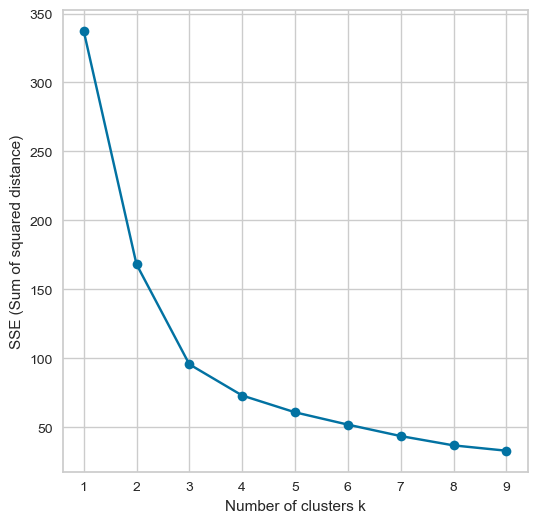

In [53]:
sse = [] #list of the sum of squared distance between the data points in each cluster
listk = list(range(1,10))

#interact with each k number possibility to find an elbow curve
for k in listk:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(6, 6))
plt.plot(listk, sse, '-o')
plt.xlabel(f'Number of clusters k')
plt.ylabel('SSE (Sum of squared distance)')

### Using KElbowVisualize from yellowbrick.cluster

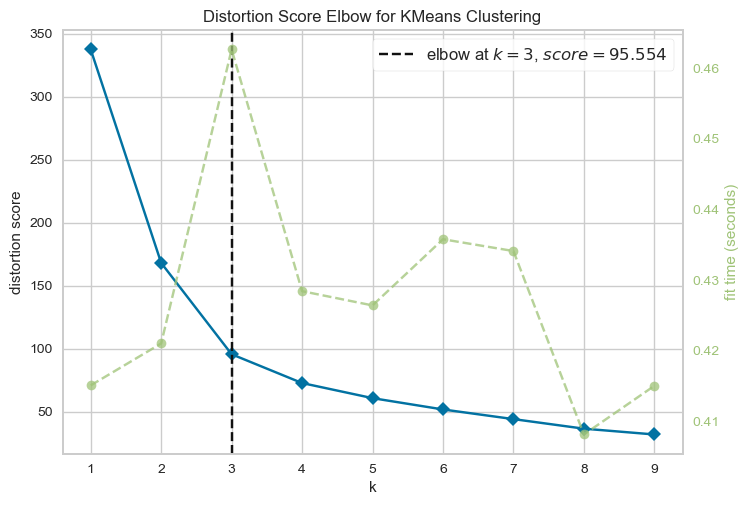

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [54]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(df)
visualizer.show()

### KMean method
Now we know that a good k number is equal to '3', let's apply this value to a k-mean clustering


In [126]:
km = KMeans(n_clusters=3).fit(df)
cluster_labels = km.fit_predict(df)

centroids = km.cluster_centers_

## Plotting KMean

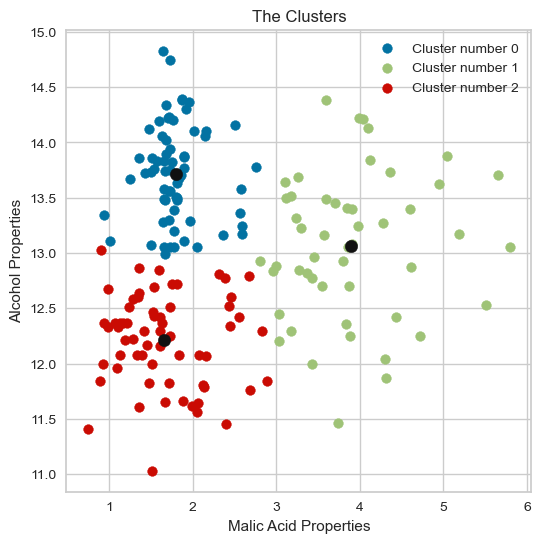

In [131]:
plt.figure(figsize=(6,6))

n_labels = np.unique(cluster_labels)

for labels in n_labels: #plotting each cluster from cluster_labels
    plt.scatter(df.iloc[cluster_labels == labels, 1], df.iloc[cluster_labels == labels, 0], 
                label = f'Cluster number {n_labels[labels]}')
    

plt.scatter(centroids[:, 1], centroids[:, 0], s = 80, color = 'k') #plotting the centroids of each cluster

plt.xlabel('Malic Acid Properties')
plt.ylabel('Alcohol Properties')
plt.title('The Clusters')
plt.legend()
plt.show()

## KMedoids method

In [141]:
kmedoids = KMedoids(n_clusters=3, random_state=1).fit(df)

kmds_labels = kmedoids.fit_predict(df)
kmds_center = kmedoids.cluster_centers_

### Plotting

In [142]:
plt.figure(figsize=(0,0))
n_kmds = np.unique(kmds_labels)

for labels in n_kmds: #plotting each cluster from cluster_labels
    plt.scatter(df.iloc[kmds_labels == labels, 1], df.iloc[kmds_labels == labels, 0], 
                label = f'Cluster number {n_kmds[labels]}')
    

[0 1 2]


<Figure size 0x0 with 0 Axes>